

# **II. Palmprint Recognition Based On Siamese Networks**
Image similarity estimation using a Siamese Network


## **Introduction**
Siamese networks are neural networks that share weights between two or more similar networks, each of which generates embedding vectors of their respective inputs.

In supervised similarity learning, the networks are then trained to maximize the contrast (distance) between embeddings of inputs from different layers, while minimizing the distance between embeddings of similar layers, resulting in embedding spaces that reflect the class segmentation of the training inputs.

### **1. Setup**

In [1]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Step 1: Load ROI data from part I (Output of I)**

In [2]:
import os
from glob import glob
import imageio as iio
import cv2
from skimage.transform import resize

X_images = []
y_images = []

train_x =[]
train_y = []

val_x =[]
val_y = []

test_x =[]
test_y = []
 
# Read ROI data
labels = os.listdir('ROI_session1/')
labels = sorted(labels)

for class_ in labels:
    pp_label = glob(f'ROI_session1/{class_}/*.JPEG')
    class_imgs_path = sorted(pp_label) 
    count = 0
    for i in class_imgs_path:
        count = count +1
        img = cv2.imread(i)
        img = resize(img, (128, 128))
        if count <= 6:
            train_x.append(img)
            train_y.append((int(class_))) #type(int("10"))
        else:
            if count <=8 :
                val_x.append(img)
                val_y.append((int(class_))) #type(int("10"))
            else:
                test_x.append(img)
                test_y.append((int(class_))) #type(int("10"))
                            
print("Done!!!")  

Done!!!


In [3]:
print(len(train_x))
print(len(val_x))
print(len(test_x))

1800
600
600


In [4]:
print(train_x[0].shape)
print(train_x[0])

(128, 128, 3)
[[[0.2642025  0.2642025  0.2642025 ]
  [0.29505378 0.29505378 0.29505378]
  [0.31857879 0.31857879 0.31857879]
  ...
  [0.37200684 0.37200684 0.37200684]
  [0.31845289 0.31845289 0.31845289]
  [0.24441643 0.24441643 0.24441643]]

 [[0.26221981 0.26221981 0.26221981]
  [0.28828673 0.28828673 0.28828673]
  [0.30827361 0.30827361 0.30827361]
  ...
  [0.33401709 0.33401709 0.33401709]
  [0.28508819 0.28508819 0.28508819]
  [0.21545768 0.21545768 0.21545768]]

 [[0.25866794 0.25866794 0.25866794]
  [0.28173739 0.28173739 0.28173739]
  [0.2981539  0.2981539  0.2981539 ]
  ...
  [0.30495859 0.30495859 0.30495859]
  [0.26004627 0.26004627 0.26004627]
  [0.21005076 0.21005076 0.21005076]]

 ...

 [[0.15241706 0.15241706 0.15241706]
  [0.15822274 0.15822274 0.15822274]
  [0.17872093 0.17872093 0.17872093]
  ...
  [0.31881352 0.31881352 0.31881352]
  [0.31043943 0.31043943 0.31043943]
  [0.29481136 0.29481136 0.29481136]]

 [[0.1324174  0.1324174  0.1324174 ]
  [0.13807752 0.1380775

### **Step 2: Convert data to model input**

In [5]:
X_images = np.array(X_images)
y_images = np.array(y_images)

train_x = np.array(train_x)
train_y = np.array(train_y)

val_x = np.array(val_x)
val_y = np.array(val_y)

test_x = np.array(test_x)
test_y = np.array(test_y)

### **Step 3: Prepare train, validation, test datasets**

In [6]:
x_train = train_x
x_train = x_train.astype("float64")
y_train = train_y

x_val = val_x
x_val = x_val.astype("float64")
y_val = val_y

x_test = test_x
x_test = x_test.astype("float64")
y_test = test_y

In [7]:
print(x_train[0])

[[[0.2642025  0.2642025  0.2642025 ]
  [0.29505378 0.29505378 0.29505378]
  [0.31857879 0.31857879 0.31857879]
  ...
  [0.37200684 0.37200684 0.37200684]
  [0.31845289 0.31845289 0.31845289]
  [0.24441643 0.24441643 0.24441643]]

 [[0.26221981 0.26221981 0.26221981]
  [0.28828673 0.28828673 0.28828673]
  [0.30827361 0.30827361 0.30827361]
  ...
  [0.33401709 0.33401709 0.33401709]
  [0.28508819 0.28508819 0.28508819]
  [0.21545768 0.21545768 0.21545768]]

 [[0.25866794 0.25866794 0.25866794]
  [0.28173739 0.28173739 0.28173739]
  [0.2981539  0.2981539  0.2981539 ]
  ...
  [0.30495859 0.30495859 0.30495859]
  [0.26004627 0.26004627 0.26004627]
  [0.21005076 0.21005076 0.21005076]]

 ...

 [[0.15241706 0.15241706 0.15241706]
  [0.15822274 0.15822274 0.15822274]
  [0.17872093 0.17872093 0.17872093]
  ...
  [0.31881352 0.31881352 0.31881352]
  [0.31043943 0.31043943 0.31043943]
  [0.29481136 0.29481136 0.29481136]]

 [[0.1324174  0.1324174  0.1324174 ]
  [0.13807752 0.13807752 0.13807752]


In [8]:
print(y_val)

[  1   1  10  10 100 100 101 101 102 102 103 103 104 104 105 105 106 106
 107 107 108 108 109 109  11  11 110 110 111 111 112 112 113 113 114 114
 115 115 116 116 117 117 118 118 119 119  12  12 120 120 121 121 122 122
 123 123 124 124 125 125 126 126 127 127 128 128 129 129  13  13 130 130
 131 131 132 132 133 133 134 134 135 135 136 136 137 137 138 138 139 139
  14  14 140 140 141 141 142 142 143 143 144 144 145 145 146 146 147 147
 148 148 149 149  15  15 150 150 151 151 152 152 153 153 154 154 155 155
 156 156 157 157 158 158 159 159  16  16 160 160 161 161 162 162 163 163
 164 164 165 165 166 166 167 167 168 168 169 169  17  17 170 170 171 171
 172 172 173 173 174 174 175 175 176 176 177 177 178 178 179 179  18  18
 180 180 181 181 182 182 183 183 184 184 185 185 186 186 187 187 188 188
 189 189  19  19 190 190 191 191 192 192 193 193 194 194 195 195 196 196
 197 197 198 198 199 199   2   2  20  20 200 200 201 201 202 202 203 203
 204 204 205 205 206 206 207 207 208 208 209 209  2

### **Step 4: Generate image pairs for training, validation and testing**

In [9]:
def make_pairs(x, y):
    num_classes = max(y) + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]
    
    pairs = []
    labels = []

    for idx1 in range(len(x)):
        # Add a matching example
        x1 = x[idx1]
        label1 = y[idx1]
       
        idx2 = random.choice(digit_indices[label1])
        x2 = x[idx2]

        pairs += [[x1, x2]]
        labels += [1]

        # Add a non-matching example
        label2 = random.randint(0, num_classes - 1)
        
        while label2 == label1:
            label2 = random.randint(0, num_classes - 1)
        while label2 == 0:
            label2 = random.randint(0, num_classes - 1)
        
        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]

        pairs += [[x1, x2]]
        labels += [0]

    return np.array(pairs), np.array(labels).astype("float32")


# Make train pairs
pairs_train, labels_train = make_pairs(x_train, y_train)

# Make validation pairs
pairs_val, labels_val = make_pairs(x_val, y_val)

# Make test pairs
pairs_test, labels_test = make_pairs(x_test, y_test)

print("Done!")

Done!


**Split the train pair**

In [10]:
x_train_1 = pairs_train[:, 0]
x_train_2 = pairs_train[:, 1]

**Split the validation pair**

In [11]:
x_val_1 = pairs_val[:, 0]
x_val_2 = pairs_val[:, 1]

**Split the test pair**

In [12]:
x_test_1 = pairs_test[:, 0]
x_test_2 = pairs_test[:, 1]

### Visualize image pairs

In [13]:
def visualize(pairs, labels, to_show=6, num_col=3, predictions=None, test=False):
    # Define num_row
    # If to_show % num_col != 0
    #    trim to_show,
    #       to trim to_show limit num_row to the point where
    #       to_show % num_col == 0
    #
    # If to_show//num_col == 0
    #    then it means num_col is greater then to_show
    #    increment to_show
    #       to increment to_show set num_row to 1
    num_row = to_show // num_col if to_show // num_col != 0 else 1

    # `to_show` must be an integral multiple of `num_col`
    #  we found num_row and we have num_col
    #  to increment or decrement to_show
    #  to make it integral multiple of `num_col`
    #  simply set it equal to num_row * num_col
    to_show = num_row * num_col

    # Plot the images
    fig, axes = plt.subplots(num_row, num_col, figsize=(5, 5))
    for i in range(to_show):

        # If the number of rows is 1, the axes array is one-dimensional
        if num_row == 1:
            ax = axes[i % num_col]
        else:
            ax = axes[i // num_col, i % num_col]

        ax.imshow(tf.concat([(pairs[i][0]*255).astype(np.uint8), (pairs[i][1]*255).astype(np.uint8)], axis=1), cmap="gray")
        #ax.imshow(np.concatenate([pairs[i][0], pairs[i][1]], axis=1))
        
        ax.set_axis_off()
        if test:
            ax.set_title("True: {} | Pred: {:.5f}".format(labels[i], predictions[i][0]))
        else:
            ax.set_title("Label: {}".format(labels[i]))
    if test:
        plt.tight_layout(rect=(0, 0, 1.9, 1.9), w_pad=0.0)
    else:
        plt.tight_layout(rect=(0, 0, 1.5, 1.5))
    #plt.imshow((out * 255).astype(np.uint8))
    plt.show()

**Review some training pairs**

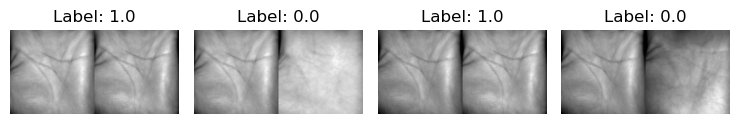

In [14]:
visualize(pairs_train[:-1], labels_train[:-1], to_show=1, num_col=4)

**Review some validation pairs**

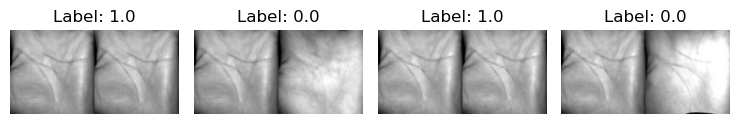

In [15]:
visualize(pairs_val[:-1], labels_val[:-1], to_show=4, num_col=4)

**Review some test pairs**

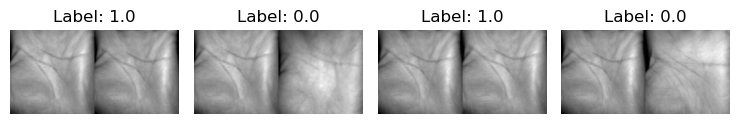

In [16]:
visualize(pairs_test[:-1], labels_test[:-1], to_show=4, num_col=4)

### **Step 5: Design Siamese Network model parameters**

There are two input layers, each leading to its own network, which generates the embeddings. The `Lambda` layer merges them together using Eucledean into one output for the network.

In [17]:
# Provided two tensors t1 and t2
# Euclidean distance = sqrt(sum(square(t1-t2)))
def euclidean_distance(vects):
    x, y = vects
    sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
    return tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))

input = layers.Input((128, 128, 3))
x = tf.keras.layers.BatchNormalization()(input)
x = layers.Conv2D(4, (5, 5), activation="tanh")(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(16, (5, 5), activation="tanh")(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = tf.keras.layers.BatchNormalization()(x)
x = layers.Dense(100, activation="tanh")(x)
embedding_network = keras.Model(input, x)

# 2 inputs
input_1 = layers.Input((128, 128, 3))
input_2 = layers.Input((128, 128, 3))

tower_1 = embedding_network(input_1)
tower_2 = embedding_network(input_2)

# Merge inputs
merge_layer = layers.Lambda(euclidean_distance)([tower_1, tower_2])
normal_layer = tf.keras.layers.BatchNormalization()(merge_layer)

# Output
output_layer = layers.Dense(1, activation="sigmoid")(normal_layer)

siamese = keras.Model(inputs=[input_1, input_2], outputs=output_layer)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, BatchNormalization, Conv2D, AveragePooling2D, Flatten, Dense, Lambda
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import register_keras_serializable

# Define Euclidean distance function
@register_keras_serializable()
def euclidean_distance(vects):
    x, y = vects
    sum_square = tf.reduce_sum(tf.square(x - y), axis=1, keepdims=True)
    return tf.sqrt(tf.maximum(sum_square, tf.keras.backend.epsilon()))

# Define the embedding network
def create_embedding_network(input_shape):
    input = Input(input_shape)
    x = BatchNormalization()(input)
    x = Conv2D(4, (5, 5), activation="tanh")(x)
    x = AveragePooling2D(pool_size=(2, 2))(x)
    x = Conv2D(16, (5, 5), activation="tanh")(x)
    x = AveragePooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = BatchNormalization()(x)
    x = Dense(100, activation="tanh")(x)
    return Model(input, x)

input_shape = (128, 128, 3)
embedding_network = create_embedding_network(input_shape)

# Define the Siamese network
input_1 = Input(input_shape)
input_2 = Input(input_shape)

tower_1 = embedding_network(input_1)
tower_2 = embedding_network(input_2)

merge_layer = Lambda(euclidean_distance)([tower_1, tower_2])
normal_layer = BatchNormalization()(merge_layer)
output_layer = Dense(1, activation="sigmoid")(normal_layer)

siamese = Model(inputs=[input_1, input_2], outputs=output_layer)

### 5.1 Define Constrastive Loss and Train

In [19]:
@register_keras_serializable()
def loss(margin=1):
    # Contrastive loss = mean( (1-true_value) * square(prediction) +
    #                         true_value * square( max(margin-prediction, 0) ))
    def contrastive_loss(y_true, y_pred):
        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        return tf.math.reduce_mean(
            (1 - y_true) * square_pred + (y_true) * margin_square
        )
        
    return contrastive_loss

### 5.2. Define Model Compilation with Contrastive Loss above

In [20]:
margin = 1
siamese.compile(loss=loss(margin=margin), optimizer="RMSprop", metrics=["accuracy"])
siamese.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_5        │ (None, 100)       │  1,401,456 │ input_layer_4[0]… │
│ (Functional)        │                   │            │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 1)         │          0 │ functional_5[0][… │
│                     │                   │            │ functional_5[1][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1)         │          4 │ lambda_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │          2 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,401,462 (5.35 MB)

 Trainable params: 1,374,542 (5.24 MB)

 Non-trainable params: 26,920 (105.16 KB)

### 5.3 Declare path and name to save model when training

In [21]:
path_checkpoint = "cp.keras"

callback = tf.keras.callbacks.ModelCheckpoint(filepath=path_checkpoint,
                                                 save_weights_only=False,
                                                 verbose=1)

### 5.4 Train model

In [22]:
epochs = 20
batch_size = 64

In [23]:
history = siamese.fit(
    [x_train_1, x_train_2],
    labels_train,
    validation_data=([x_val_1, x_val_2], labels_val),
    batch_size=batch_size,
    epochs=epochs, callbacks=[callback],
)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.8601 - loss: 0.1528
Epoch 1: saving model to cp.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 209ms/step - accuracy: 0.8607 - loss: 0.1526 - val_accuracy: 0.5008 - val_loss: 0.2269
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.9533 - loss: 0.1189
Epoch 2: saving model to cp.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 209ms/step - accuracy: 0.9534 - loss: 0.1189 - val_accuracy: 0.6392 - val_loss: 0.1745
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.9743 - loss: 0.1030
Epoch 3: saving model to cp.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 233ms/step - accuracy: 0.9744 - loss: 0.1029 - val_accuracy: 0.9567 - val_loss: 0.0971
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.9911 - loss: 0.0837
Epoch 4: saving model to cp.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 211ms/step - accuracy: 0.9911 - loss: 0.0837 - val_accuracy: 0.9883 - val_loss: 0.0663
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/s

### 5.5. Save model

In [24]:
siamese.save("siamese_model.keras")

### 5.6. Load model với checkpoint nếu cần

In [25]:
# siamese.load_weights(path_checkpoint)

### **Step 6. Plot the training error model**

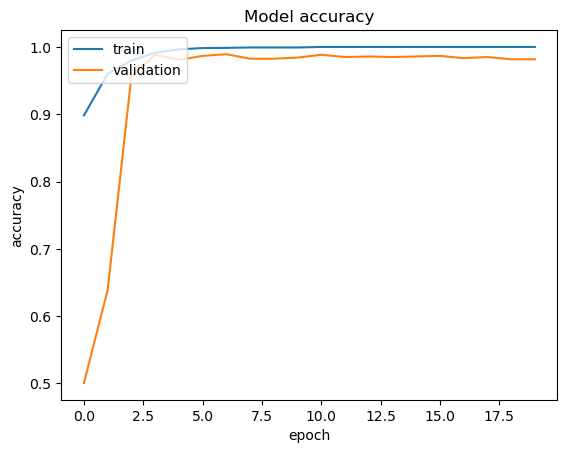

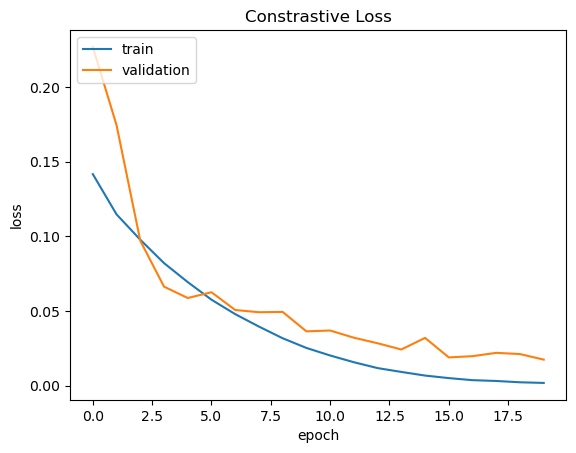

In [26]:
def plt_metric(history, metric, title, has_valid=True):
    """Plots the given 'metric' from 'history'.

    Arguments:
        history: history attribute of History object returned from Model.fit.
        metric: Metric to plot, a string value present as key in 'history'.
        title: A string to be used as title of plot.
        has_valid: Boolean, true if valid data was passed to Model.fit else false.

    Returns:
        None.
    """
    plt.plot(history[metric])
    if has_valid:
        plt.plot(history["val_" + metric])
        plt.legend(["train", "validation"], loc="upper left")
    plt.title(title)
    plt.ylabel(metric)
    plt.xlabel("epoch")
    plt.show()

# Plot the accuracy
plt_metric(history=history.history, metric="accuracy", title="Model accuracy")

# Plot the constrastive loss
plt_metric(history=history.history, metric="loss", title="Constrastive Loss")

### **Step 7. Check model error**

In [27]:
results = siamese.evaluate([x_test_1, x_test_2], labels_test)
print("test loss, test acc:", results)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9854 - loss: 0.0149
test loss, test acc: [0.01869477704167366, 0.9791666865348816]


### **Step 8. Testing with Test set**

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


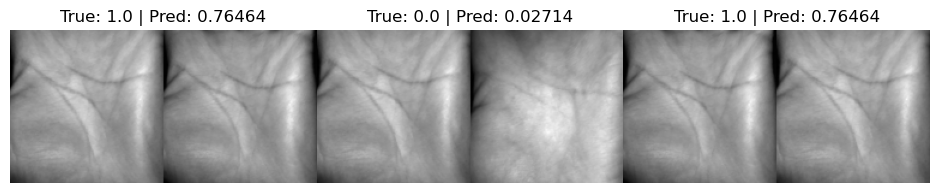

In [28]:
predictions = siamese.predict([x_test_1, x_test_2])
visualize(pairs_test, labels_test, to_show=3, predictions=predictions, test=True)

### **Step 9. Check again with the saved model**

In [31]:
# Load the saved model with the custom objects
loaded_siamese_model = tf.keras.models.load_model("siamese_model.keras", custom_objects={'contrastive_loss': loss(margin), 'euclidean_distance': euclidean_distance})

# Verify the model architecture and weights
loaded_siamese_model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_5        │ (None, 100)       │  1,401,456 │ input_layer_4[0]… │
│ (Functional)        │                   │            │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 1)         │          0 │ functional_5[0][… │
│                     │                   │            │ functional_5[1][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1)         │          4 │ lambda_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │          2 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,776,006 (10.59 MB)

 Trainable params: 1,374,542 (5.24 MB)

 Non-trainable params: 26,920 (105.16 KB)

 Optimizer params: 1,374,544 (5.24 MB)

In [32]:
results = loaded_siamese_model.evaluate([x_test_1, x_test_2], labels_test)
print("test loss, test acc:", results)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9867 - loss: 0.0147
test loss, test acc: [0.015213346108794212, 0.987500011920929]
